## Problem Statement:

The objective of this study is to segment the similar user and similar items in to clusters. Understanding the common charecteristic of each group will help the organization to promote their bussiness.

The datasets used in this work contain measurements of clothing fit from RentTheRunway.
RentTheRunWay is a unique platform that allows women to rent clothes for various occasions; we collected data from several categories. These datasets contain self-reported fit feedback from customers as well as other side information like reviews, ratings, product categories, catalog sizes, customers’ measurements (etc.). In this datasets, fit feedback belongs to one of three classes: ‘Small,’ ‘Fit,’ and ‘Large.’

## FILE DESCRIPTION
These datasets contain measurements of clothing fit from RentTheRunway.
	                  
1. Number of users:	    105,508
2. Number of items:	    5,850
3. Number of transactions:	192,544

Metadata:
    1. ratings and reviews
    2. fit feedback (small/fit/large etc.)
    3. user/item measurements 
    4. category information
    
Data Citation:
Decomposing fit semantics for product size recommendation in metric spaces
Rishabh Misra, Mengting Wan, Julian McAuley
RecSys, 2018

Weblink for data:
https://cseweb.ucsd.edu/~jmcauley/datasets.html#clothing_fit

We have altered this dataset by deriving some new columns which has been computed by applying text analytics statergies on the review column of data.

Appropriate features need to be selected for user segmentation(clustering) and Item Segmentation (clustering) process.  


## Import required libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None
pd.options.display.max_columns=None

## Load the dataset.

In [2]:
df = pd.read_csv('final_cluster_data_cloth.csv')
df.head()

,fit,user_id,item_id,weight,rating,rented for,body type,category,height,size,age,review_sum_Pol,review_sum_Subj,review_text__Pol,review_text_Subj,text_compound,text_neg,text_neu,text_pos,sum_compound,sum_neg,sum_neu,sum_pos,size1,size2
0,fit,420272,2260466,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0,0.625000,0.500000,0.181548,0.623810,0.9453,0.021,0.676,0.303,0.9453,0.0,0.379,0.621,0.708333,d
1,fit,273551,153475,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0,0.000000,0.000000,0.360667,0.686667,0.8991,0.046,0.696,0.258,0.8991,0.0,0.387,0.613,0.708333,b
2,fit,360448,1063761,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0,0.525000,0.541667,0.489762,0.570476,0.9333,0.000,0.713,0.287,0.9333,0.0,0.658,0.342,NaN,NaN
3,fit,909926,126335,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0,1.000000,1.000000,0.213056,0.461556,0.9559,0.034,0.746,0.219,0.9559,0.0,0.654,0.346,0.708333,c
4,fit,151944,616682,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0,0.976562,0.600000,-0.054028,0.320417,0.6239,0.014,0.936,0.050,0.6239,0.0,0.542,0.458,0.708333,b


## Lets check the shape.

In [3]:
df.shape

(192544, 25)

## Lets check the value counts in the Original Class (target variable).

In [4]:
df['fit'].value_counts()

fit      142058
small     25779
large     24707
Name: fit, dtype: int64

## Lets check the datatypes.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fit               192544 non-null  object 
 1   user_id           192544 non-null  int64  
 2   item_id           192544 non-null  int64  
 3   weight            162562 non-null  object 
 4   rating            192462 non-null  float64
 5   rented for        192534 non-null  object 
 6   body type         177907 non-null  object 
 7   category          192544 non-null  object 
 8   height            191867 non-null  object 
 9   size              192544 non-null  int64  
 10  age               191584 non-null  float64
 11  review_sum_Pol    192544 non-null  float64
 12  review_sum_Subj   192544 non-null  float64
 13  review_text__Pol  192544 non-null  float64
 14  review_text_Subj  192544 non-null  float64
 15  text_compound     192544 non-null  float64
 16  text_neg          19

## Lets clean the data

In [6]:
df['fit'].unique()    ## target variable, we will exclude it while building the model.

array(['fit', 'small', 'large'], dtype=object)

In [7]:
df['user_id'].nunique()   ## we will drop the user_id for now and add it later.

105571

In [8]:
df['item_id'].nunique()   ## we will drop the item_id for now and add it later.

5850

In [9]:
df['weight'].unique()[:5]   ## we need to get only the numeric values and convert the datatype to int or float.

array(['137lbs', '132lbs', nan, '135lbs', '145lbs'], dtype=object)

In [10]:
df['weight'] = df['weight'].str.replace('lbs','').astype(float) ## we removed 'lbs' from the data.

In [11]:
df['weight'].head()

0    137.0
1    132.0
2      NaN
3    135.0
4    145.0
Name: weight, dtype: float64

In [12]:
df['rating'].unique()

array([10.,  8.,  4.,  6.,  2., nan])

In [13]:
df['rented for'].value_counts()

wedding            57784
formal affair      40408
party              35626
everyday           16822
other              15388
work               15042
date                7388
vacation            4075
party: cocktail        1
Name: rented for, dtype: int64

In [14]:
df['rented for'] = df['rented for'].str.replace('party: cocktail','party')

In [15]:
df['rented for'].value_counts()

wedding          57784
formal affair    40408
party            35627
everyday         16822
other            15388
work             15042
date              7388
vacation          4075
Name: rented for, dtype: int64

In [16]:
df['body type'].value_counts()

hourglass            55349
athletic             43667
pear                 22135
petite               22131
full bust            15006
straight & narrow    14742
apple                 4877
Name: body type, dtype: int64

In [17]:
df['category'].value_counts()  ## group up the categories (for now lets drop it)

dress           92884
gown            44381
sheath          19316
shift            5365
jumpsuit         5184
                ...  
sweatershirt        4
overcoat            2
sweatpants          2
buttondown          1
crewneck            1
Name: category, Length: 68, dtype: int64

In [18]:
df['height'].head()

0    5' 8"
1    5' 6"
2    5' 4"
3    5' 5"
4    5' 9"
Name: height, dtype: object

In [19]:
df['height'] = df['height'].str.replace("'",'')

In [20]:
df['height'] = df['height'].str.replace('"','')

In [21]:
df['height'].head()

0    5 8
1    5 6
2    5 4
3    5 5
4    5 9
Name: height, dtype: object

In [22]:
df['height'] = (df['height'].str[:1].astype(float)*12 + df['height'].str[1:].astype(float))

In [23]:
df['height'].head()

0    68.0
1    66.0
2    64.0
3    65.0
4    69.0
Name: height, dtype: float64

In [24]:
df.head(2)

,fit,user_id,item_id,weight,rating,rented for,body type,category,height,size,age,review_sum_Pol,review_sum_Subj,review_text__Pol,review_text_Subj,text_compound,text_neg,text_neu,text_pos,sum_compound,sum_neg,sum_neu,sum_pos,size1,size2
0,fit,420272,2260466,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0,0.625,0.5,0.181548,0.623810,0.9453,0.021,0.676,0.303,0.9453,0.0,0.379,0.621,0.708333,d
1,fit,273551,153475,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0,0.000,0.0,0.360667,0.686667,0.8991,0.046,0.696,0.258,0.8991,0.0,0.387,0.613,0.708333,b


In [25]:
df['size2'].value_counts()

c        49634
b        49110
d        45008
a        15286
dd        6703
d+        3956
ddd/e     2602
aa         710
f          458
g          440
h          156
i           40
j           30
Name: size2, dtype: int64

##### Now we pretty much cleaned the data, lets cross check the datatypes and drop the unwanted dataypes for the analysis.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fit               192544 non-null  object 
 1   user_id           192544 non-null  int64  
 2   item_id           192544 non-null  int64  
 3   weight            162562 non-null  float64
 4   rating            192462 non-null  float64
 5   rented for        192534 non-null  object 
 6   body type         177907 non-null  object 
 7   category          192544 non-null  object 
 8   height            191867 non-null  float64
 9   size              192544 non-null  int64  
 10  age               191584 non-null  float64
 11  review_sum_Pol    192544 non-null  float64
 12  review_sum_Subj   192544 non-null  float64
 13  review_text__Pol  192544 non-null  float64
 14  review_text_Subj  192544 non-null  float64
 15  text_compound     192544 non-null  float64
 16  text_neg          19

##### All the features datatypes are succesfully assigned correctly.

##### Lets drop user_id, item_id and add it later, (`Note:` for the time constrait i am dropping category and size2 features, but it may also add value for the analysis.)

In [27]:
###### The target variable in the dataset is 'fit', lets exclude that first
X = df.drop('fit',axis=1)

In [28]:
X = df.drop(['user_id','item_id','category','size2'],axis=1)
X.head(2)

,fit,weight,rating,rented for,body type,height,size,age,review_sum_Pol,review_sum_Subj,review_text__Pol,review_text_Subj,text_compound,text_neg,text_neu,text_pos,sum_compound,sum_neg,sum_neu,sum_pos,size1
0,fit,137.0,10.0,vacation,hourglass,68.0,14,28.0,0.625,0.5,0.181548,0.623810,0.9453,0.021,0.676,0.303,0.9453,0.0,0.379,0.621,0.708333
1,fit,132.0,10.0,other,straight & narrow,66.0,12,36.0,0.000,0.0,0.360667,0.686667,0.8991,0.046,0.696,0.258,0.8991,0.0,0.387,0.613,0.708333


In [29]:
X.shape

(192544, 21)

## Lets check full null values and impute them.

In [30]:
X.isnull().sum()

fit                     0
weight              29982
rating                 82
rented for             10
body type           14637
height                677
size                    0
age                   960
review_sum_Pol          0
review_sum_Subj         0
review_text__Pol        0
review_text_Subj        0
text_compound           0
text_neg                0
text_neu                0
text_pos                0
sum_compound            0
sum_neg                 0
sum_neu                 0
sum_pos                 0
size1               18411
dtype: int64

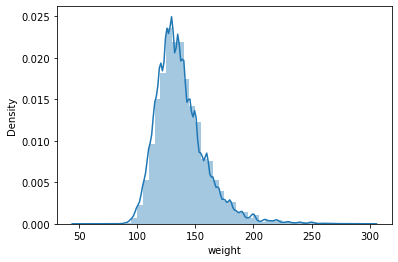

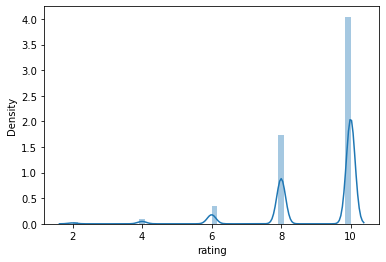

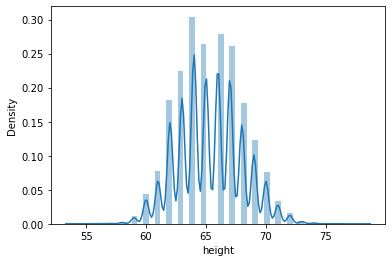

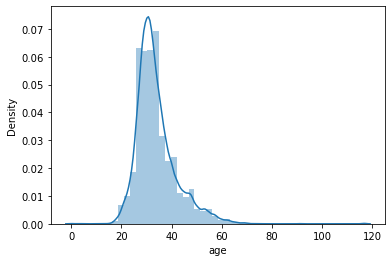

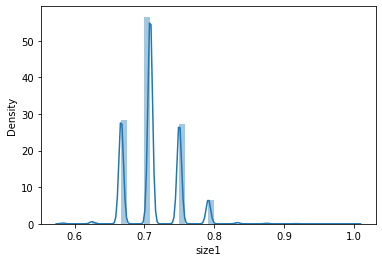

In [31]:
X_null_num = X[['weight','rating','height','age','size1']]
for i in X_null_num:
    sns.distplot(X_null_num[i])
    plt.show()

##### As we can see from above distribution plot all the numerical columns having null values are skewed lets treat them with median and categorical columns with mode.

In [32]:
mode_rented_for = X['rented for'].mode()
mode_body_type = X['body type'].mode()

In [33]:
## Numerical columns:

X['weight'] = X['weight'].fillna(X['weight'].median())
X['rating'] = X['rating'].fillna(X['rating'].median())
X['height'] = X['height'].fillna(X['height'].median())
X['age'] = X['age'].fillna(X['age'].median())
X['size1'] = X['size1'].fillna(X['size1'].median())

## Categorical columns:

X['rented for'] = X['rented for'].fillna(mode_rented_for[0])
X['body type'] = X['body type'].fillna(mode_body_type[0])

In [34]:
## Cross check
X.isnull().sum()

fit                 0
weight              0
rating              0
rented for          0
body type           0
height              0
size                0
age                 0
review_sum_Pol      0
review_sum_Subj     0
review_text__Pol    0
review_text_Subj    0
text_compound       0
text_neg            0
text_neu            0
text_pos            0
sum_compound        0
sum_neg             0
sum_neu             0
sum_pos             0
size1               0
dtype: int64

##### The null values is been taken care.

## Lets check for the outliers.

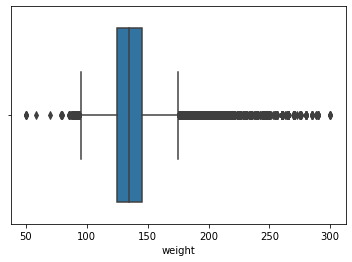

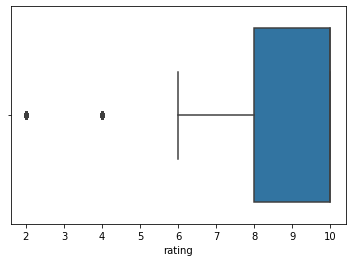

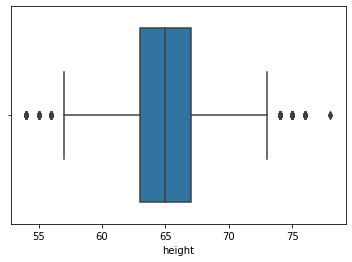

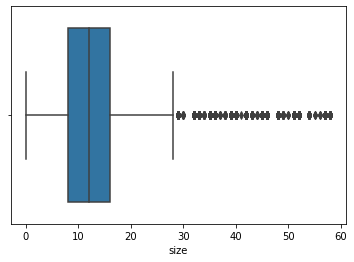

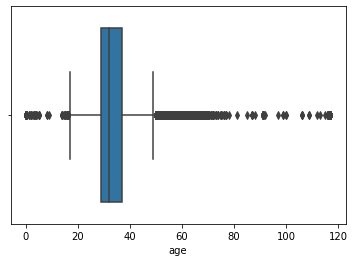

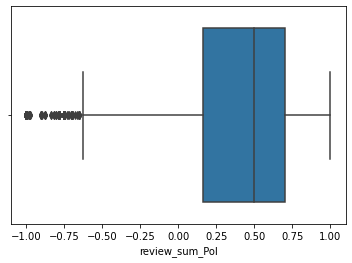

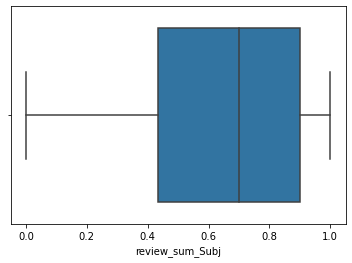

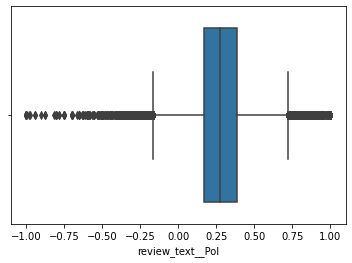

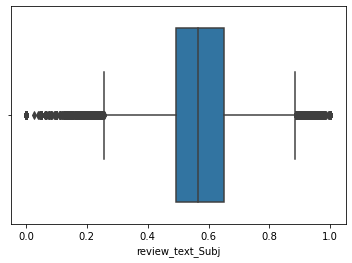

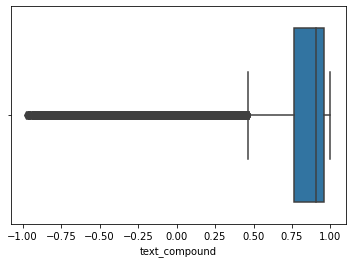

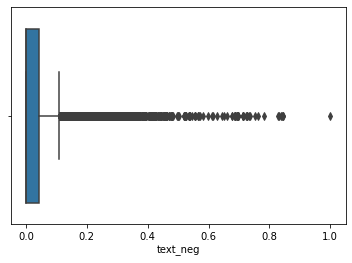

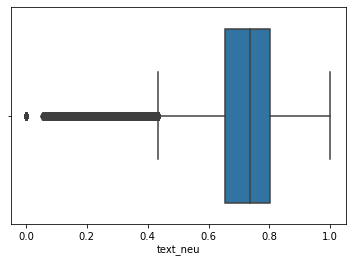

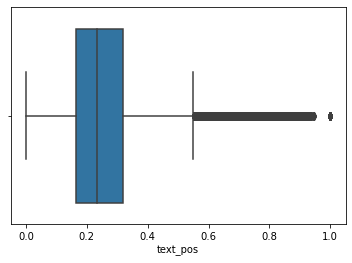

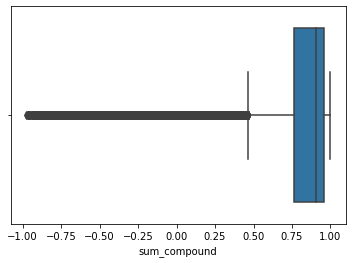

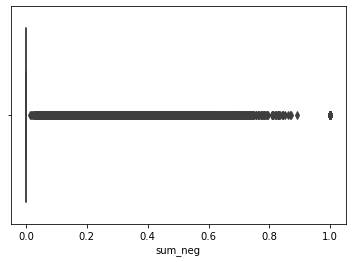

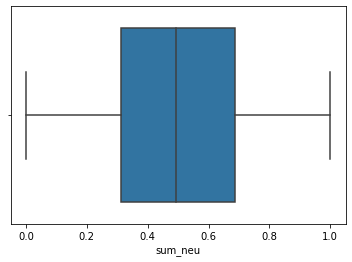

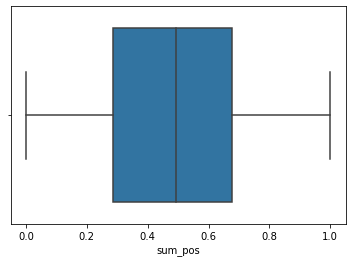

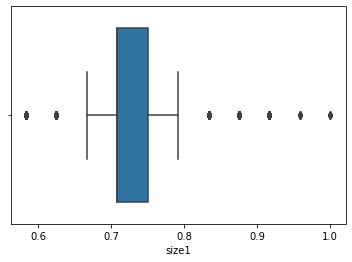

In [35]:
X_num = X.select_dtypes(include=np.number)
for i in X_num:
    sns.boxplot(X_num[i])
    plt.show()

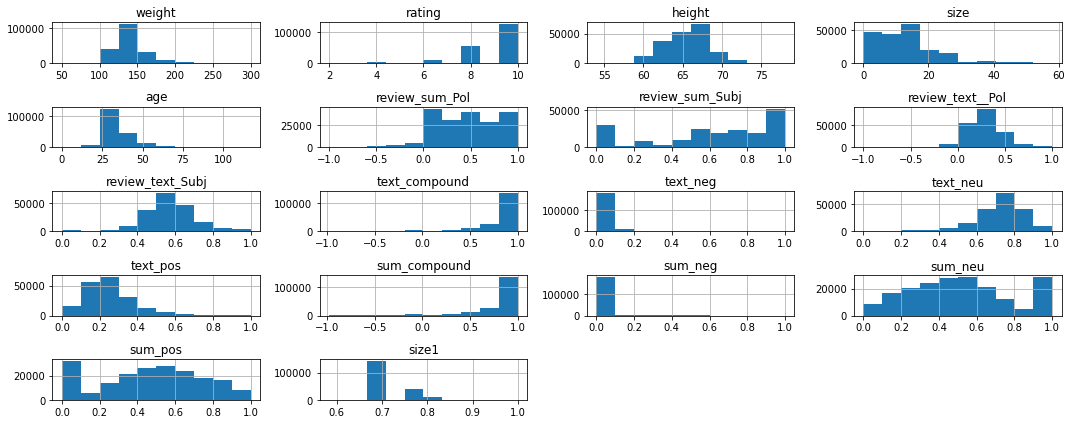

In [36]:
## lets see their distribution.
plt.rcParams['figure.figsize']=[15,6]
X_num.hist()
plt.tight_layout()
plt.show()

## Capping Technique.

In [37]:
Q1 = X_num.quantile(0.25)
Q3 = X_num.quantile(0.75)
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

X_num = pd.DataFrame(np.where(X_num>UL,UL,X_num),columns=X_num.columns)
X_num = pd.DataFrame(np.where(X_num<LL,LL,X_num),columns=X_num.columns)

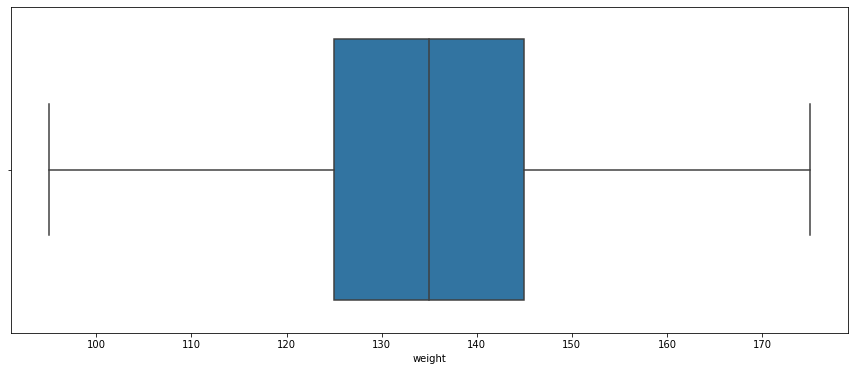

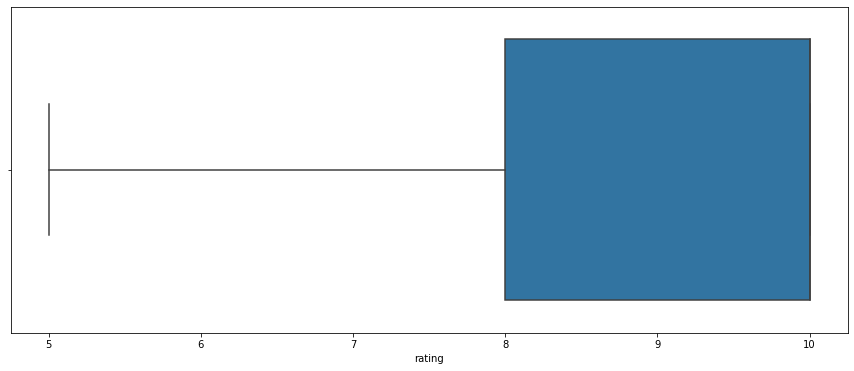

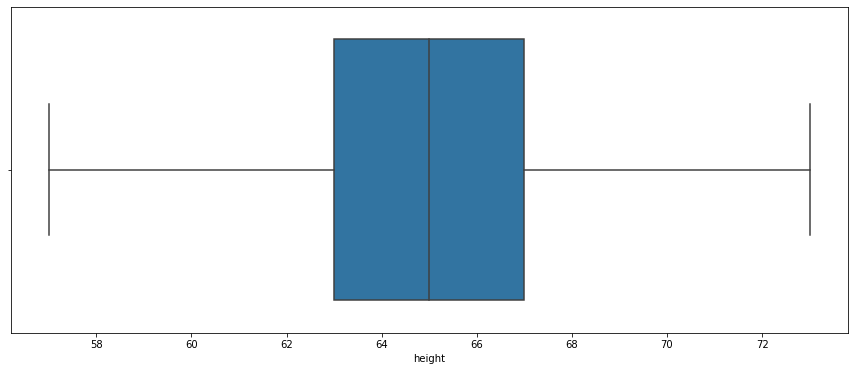

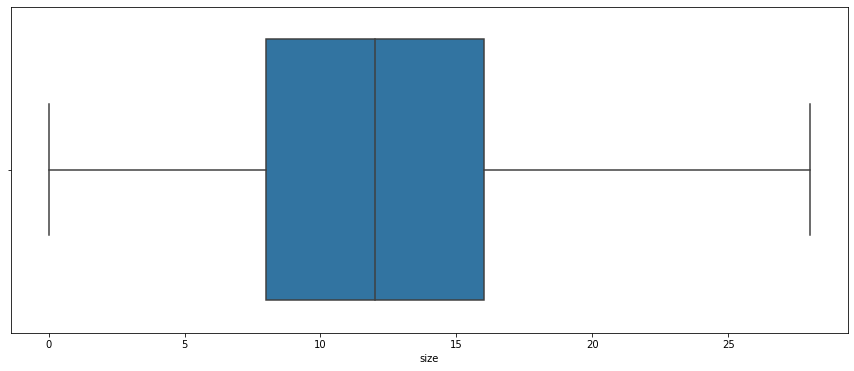

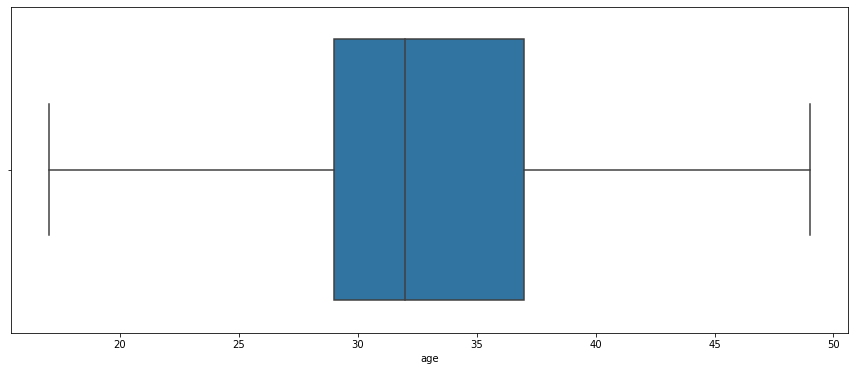

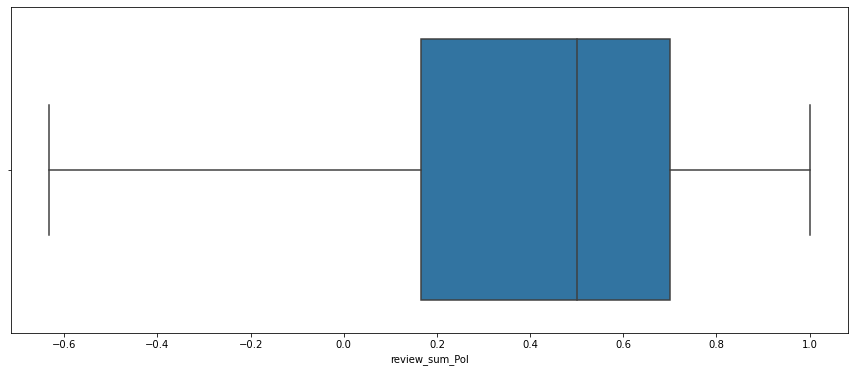

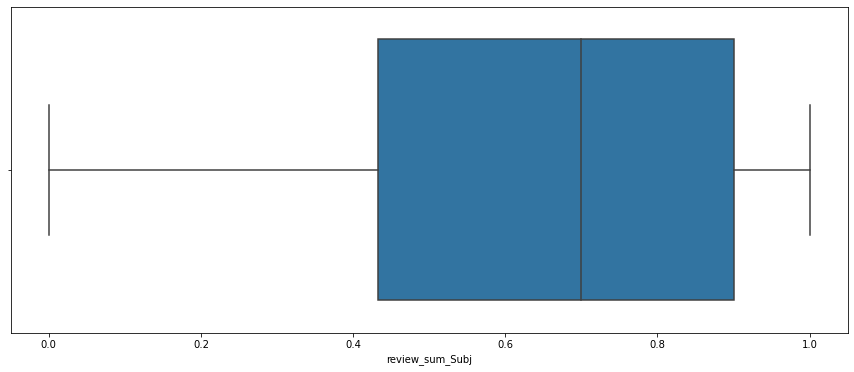

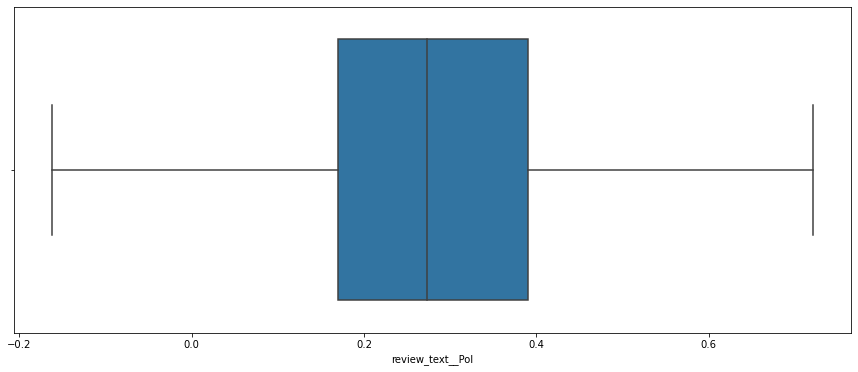

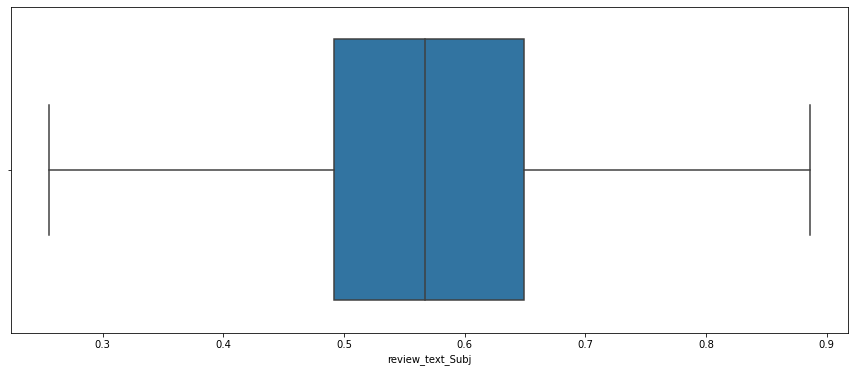

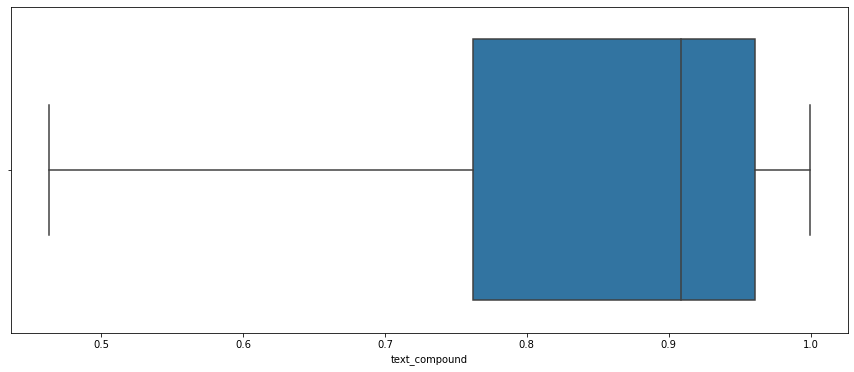

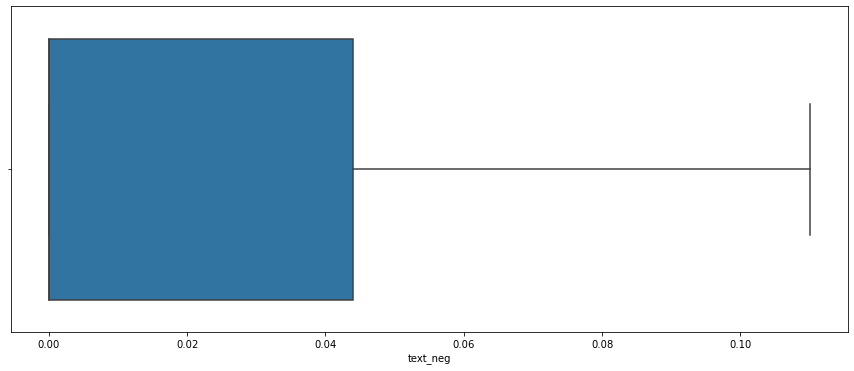

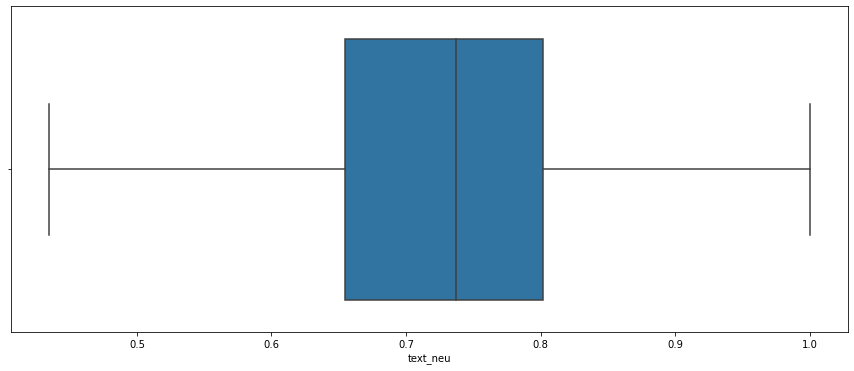

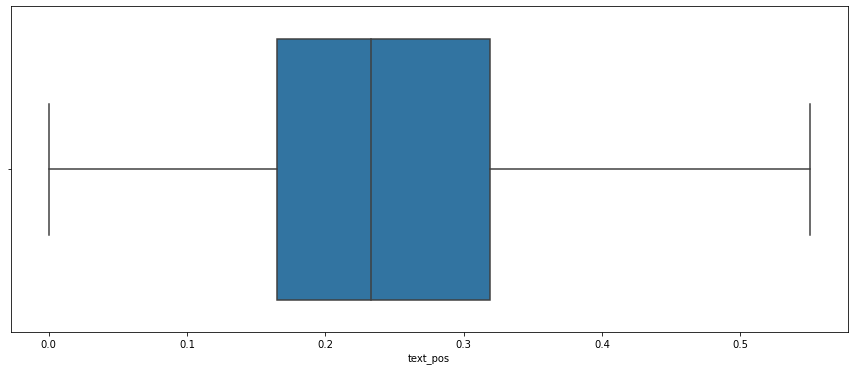

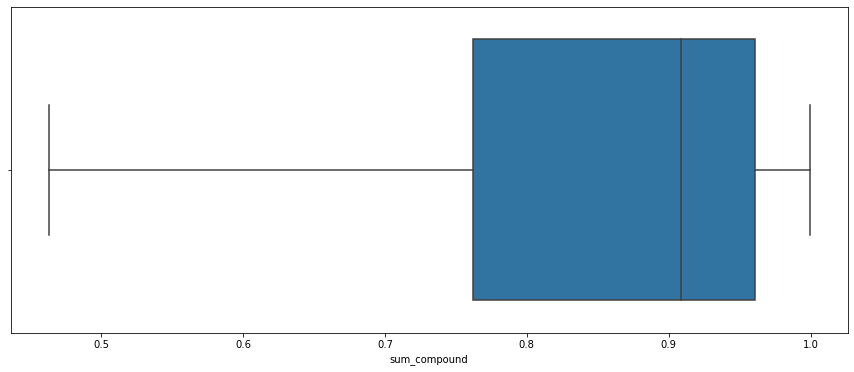

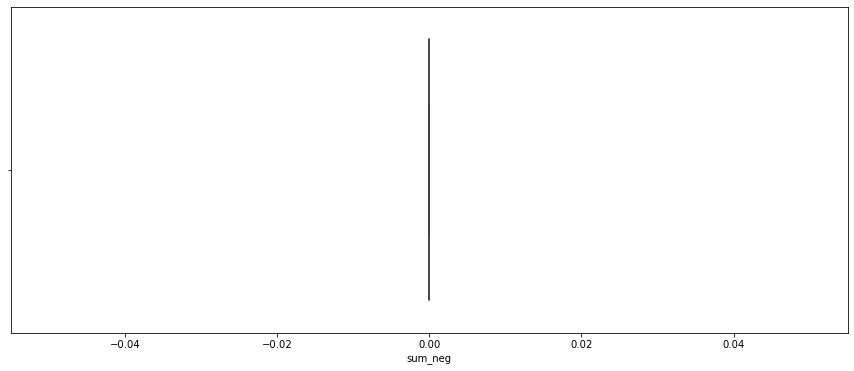

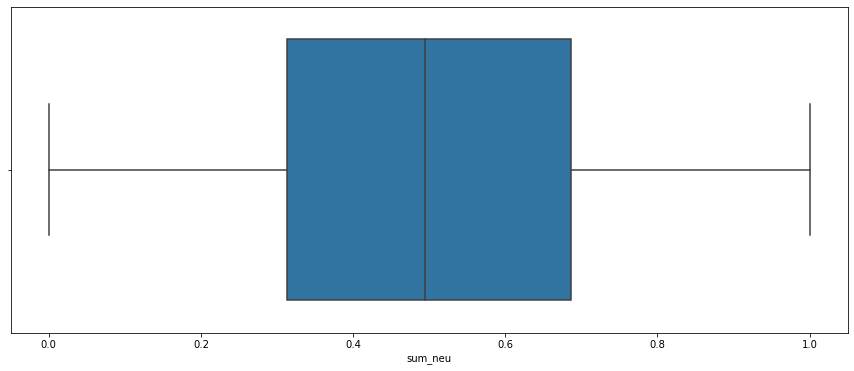

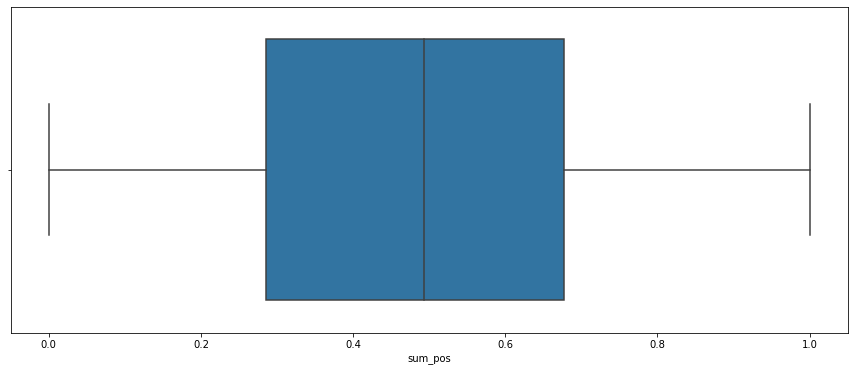

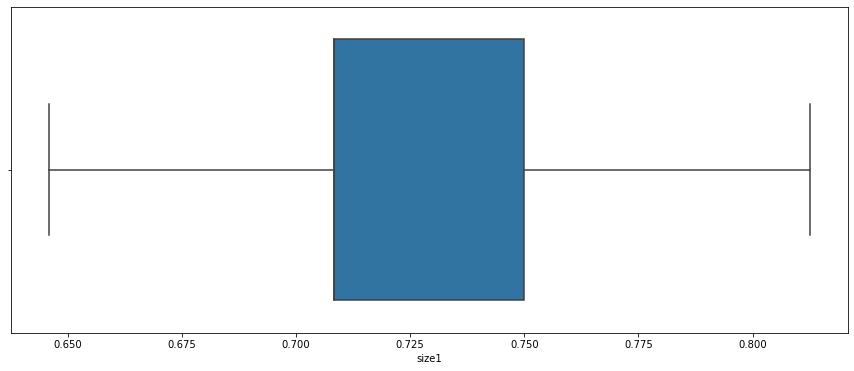

In [38]:
for i in X_num:
    sns.boxplot(X_num[i])
    plt.show()

## Lets encode the categorical variables.

In [39]:
X = pd.get_dummies(data=X,drop_first=True)
X.head()

,weight,rating,height,size,age,review_sum_Pol,review_sum_Subj,review_text__Pol,review_text_Subj,text_compound,text_neg,text_neu,text_pos,sum_compound,sum_neg,sum_neu,sum_pos,size1,fit_large,fit_small,rented for_everyday,rented for_formal affair,rented for_other,rented for_party,rented for_vacation,rented for_wedding,rented for_work,body type_athletic,body type_full bust,body type_hourglass,body type_pear,body type_petite,body type_straight & narrow
0,137.0,10.0,68.0,14,28.0,0.625000,0.500000,0.181548,0.623810,0.9453,0.021,0.676,0.303,0.9453,0.0,0.379,0.621,0.708333,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,132.0,10.0,66.0,12,36.0,0.000000,0.000000,0.360667,0.686667,0.8991,0.046,0.696,0.258,0.8991,0.0,0.387,0.613,0.708333,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,135.0,10.0,64.0,4,116.0,0.525000,0.541667,0.489762,0.570476,0.9333,0.000,0.713,0.287,0.9333,0.0,0.658,0.342,0.708333,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,135.0,8.0,65.0,8,34.0,1.000000,1.000000,0.213056,0.461556,0.9559,0.034,0.746,0.219,0.9559,0.0,0.654,0.346,0.708333,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,145.0,10.0,69.0,12,27.0,0.976562,0.600000,-0.054028,0.320417,0.6239,0.014,0.936,0.050,0.6239,0.0,0.542,0.458,0.708333,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


## Lets scale the data.

In [40]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [41]:
X.iloc[:,:18] = ss.fit_transform(X.iloc[:,:18])
X.head()

,weight,rating,height,size,age,review_sum_Pol,review_sum_Subj,review_text__Pol,review_text_Subj,text_compound,text_neg,text_neu,text_pos,sum_compound,sum_neg,sum_neu,sum_pos,size1,fit_large,fit_small,rented for_everyday,rented for_formal affair,rented for_other,rented for_party,rented for_vacation,rented for_wedding,rented for_work,body type_athletic,body type_full bust,body type_hourglass,body type_pear,body type_petite,body type_straight & narrow
0,-0.000957,0.634498,1.011893,0.206575,-0.729154,0.487450,-0.348670,-0.549519,0.386620,0.524320,-0.154470,-0.272637,0.307787,0.524320,-0.209796,-0.498721,0.544570,-0.109604,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,-0.249202,0.634498,0.259688,-0.028862,0.265991,-1.296666,-1.837773,0.396547,0.835679,0.374040,0.424357,-0.132454,0.003911,0.374040,-0.209796,-0.469898,0.516316,-0.109604,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,-0.100255,0.634498,-0.492517,-0.970608,10.217442,0.201992,-0.224578,1.078399,0.005601,0.485286,-0.640685,-0.013299,0.199743,0.485286,-0.209796,0.506508,-0.440774,-0.109604,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,-0.100255,-0.764242,-0.116415,-0.499735,0.017205,1.557920,1.140433,-0.383101,-0.772540,0.558799,0.146520,0.218002,-0.259448,0.558799,-0.209796,0.492096,-0.426647,-0.109604,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.396235,0.634498,1.387995,-0.028862,-0.853547,1.491016,-0.050849,-1.793775,-1.780851,-0.521130,-0.316541,1.549736,-1.400671,-0.521130,-0.209796,0.088563,-0.031097,-0.109604,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


## KMeans Clustering.

In [42]:
from sklearn.cluster import KMeans

In [43]:
cluster_errors = []
cluster_range = range(1,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=100)
    clusters.fit(X)
    cluster_errors.append(clusters.inertia_)

In [44]:
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
cluster_df.head()

,num_clusters,cluster_errors
0,1,3.803370e+06
1,2,3.329058e+06
2,3,3.006993e+06
3,4,2.797781e+06
4,5,2.619584e+06


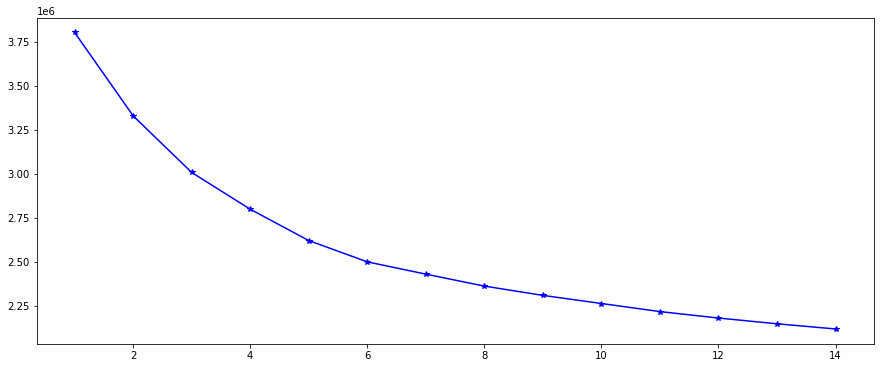

In [45]:
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='*',color='b')

##### From above elbow plot we choose optimal clusters K b/w 3 to 5. The inertia significantly decreases at the cluster values 3 to 5.

## Lets build the KMeans clustering model with the optimal cluster value K=3.

In [46]:
kmeans = KMeans(n_clusters=3,random_state=100)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=100)

In [47]:
## Lets create a dataframe of the labels.
Labels = pd.DataFrame(kmeans.labels_,columns=['Label'])
Labels.head()

,Label
0,0
1,2
2,0
3,0
4,0


In [48]:
##### Lets join the label dataframe with X dataframe.
kmeans = X.join(Labels)
kmeans.head(2)

,weight,rating,height,size,age,review_sum_Pol,review_sum_Subj,review_text__Pol,review_text_Subj,text_compound,text_neg,text_neu,text_pos,sum_compound,sum_neg,sum_neu,sum_pos,size1,fit_large,fit_small,rented for_everyday,rented for_formal affair,rented for_other,rented for_party,rented for_vacation,rented for_wedding,rented for_work,body type_athletic,body type_full bust,body type_hourglass,body type_pear,body type_petite,body type_straight & narrow,Label
0,-0.000957,0.634498,1.011893,0.206575,-0.729154,0.487450,-0.348670,-0.549519,0.386620,0.52432,-0.154470,-0.272637,0.307787,0.52432,-0.209796,-0.498721,0.544570,-0.109604,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,-0.249202,0.634498,0.259688,-0.028862,0.265991,-1.296666,-1.837773,0.396547,0.835679,0.37404,0.424357,-0.132454,0.003911,0.37404,-0.209796,-0.469898,0.516316,-0.109604,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2


In [49]:
kmeans['Label'].value_counts()

0    118094
2     53701
1     20749
Name: Label, dtype: int64

## Comparision between Original Classes and Kmeans Clustering classes.

In [50]:
print('Original Classes:')
print(df['fit'].value_counts())
print('~'*30)
print('Kmeans clustering classes:')
print(kmeans['Label'].value_counts())

Original Classes:
fit      142058
small     25779
large     24707
Name: fit, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Kmeans clustering classes:
0    118094
2     53701
1     20749
Name: Label, dtype: int64
